In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [17,6]

Text(0.5, 1.0, 'Missing value in dataset')

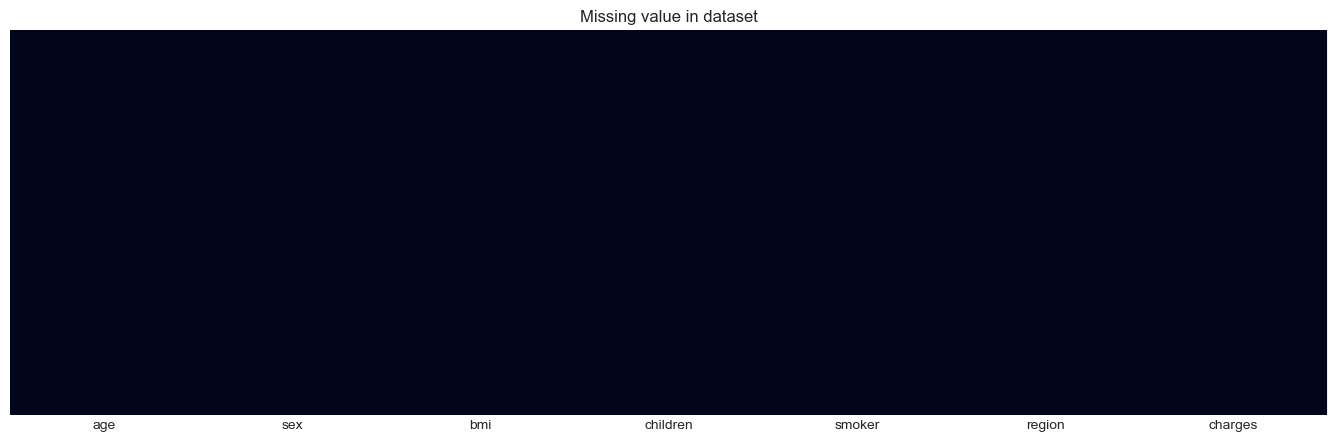

In [9]:
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing value in dataset')

<AxesSubplot: >

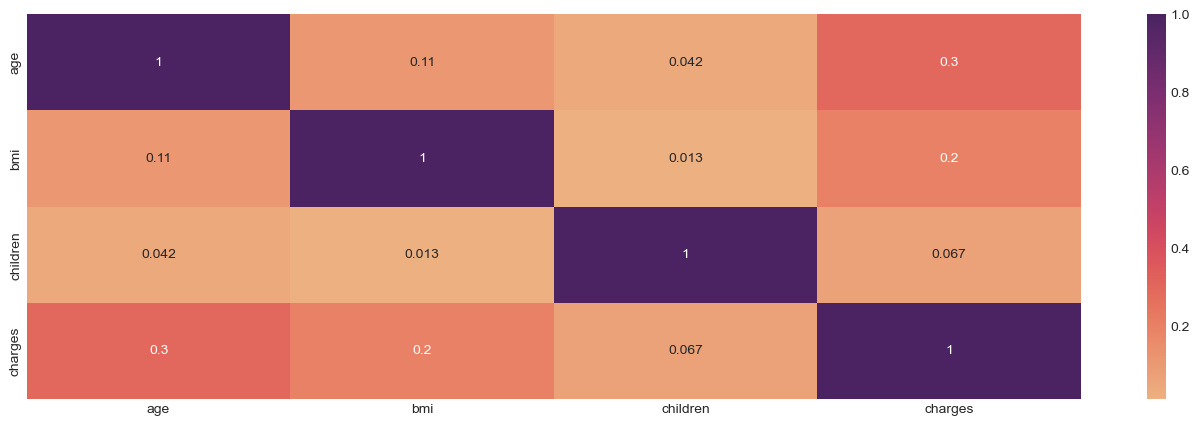

In [10]:
corr=df.corr()
plt.figure(figsize=(17,5))
sns.heatmap(corr, cmap='flare', annot=True)

Text(0.5, 1.0, 'Distribution of Charges')

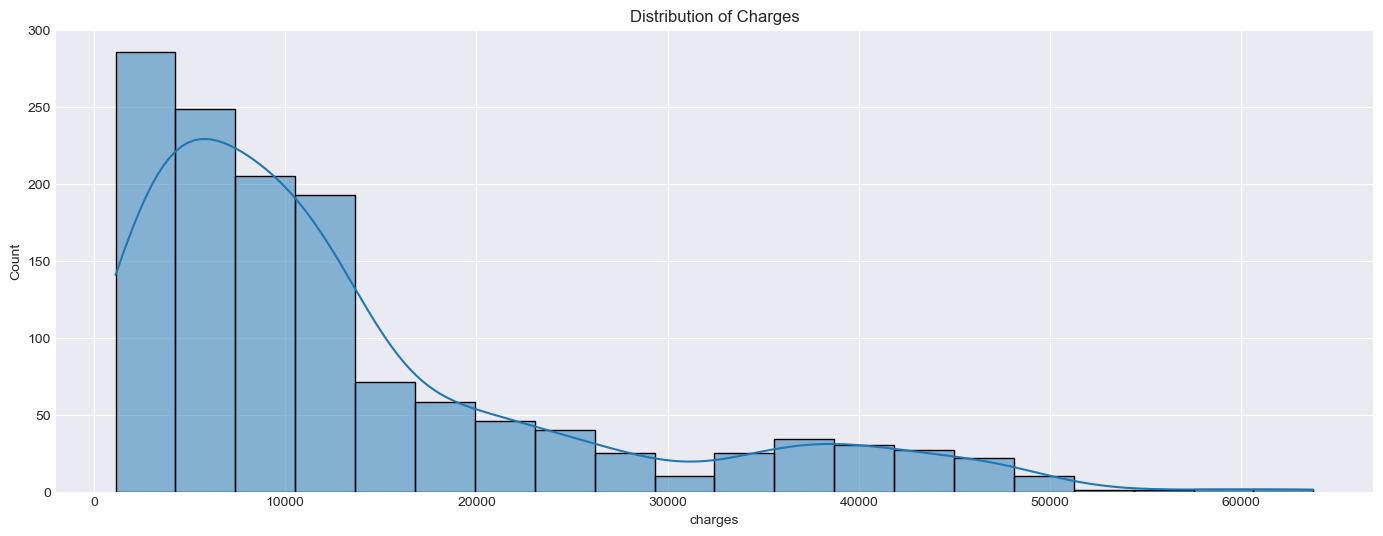

In [11]:
# show distribution charges

sns.histplot(data=df, x='charges', bins=20, kde=True)
plt.title('Distribution of Charges')

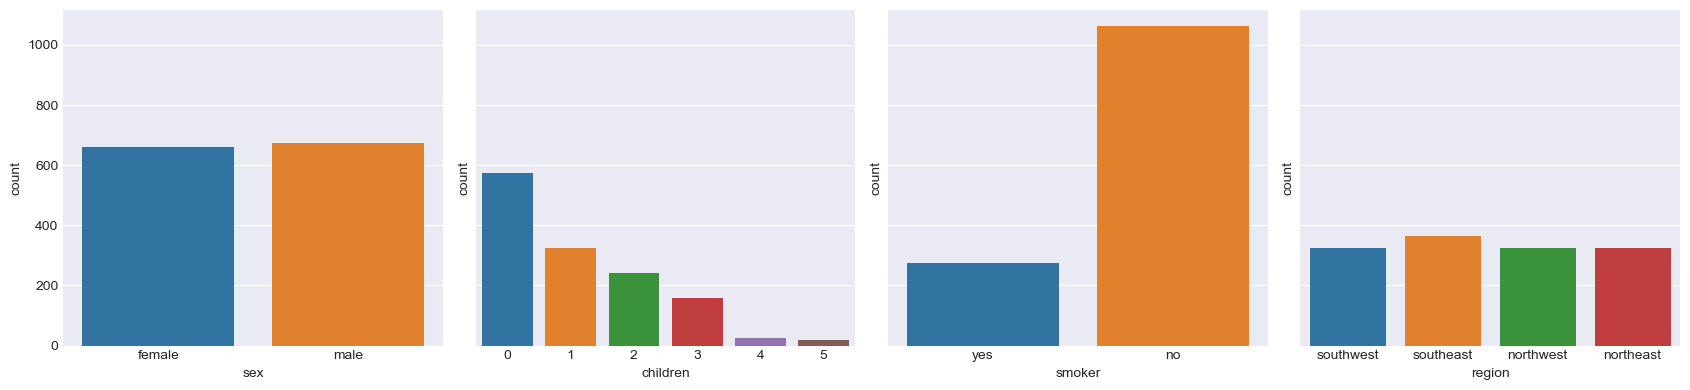

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(17,4), sharey=True)
axs = axs.ravel()

for index, col in enumerate(['sex', 'children', 'smoker', 'region']):
    sns.countplot(data=df, x=col, ax=axs[index])
plt.tight_layout()

In [13]:
def charges_dist_by_cate(col):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17,5), sharex=True)
    axs= axs.ravel()

    sns.histplot(data=df, x='charges', kde=True, hue=col, ax=axs[0], palette='turbo')
    sns.boxenplot(data=df, x='charges', y=col, orient='h', ax=axs[1], palette='turbo')

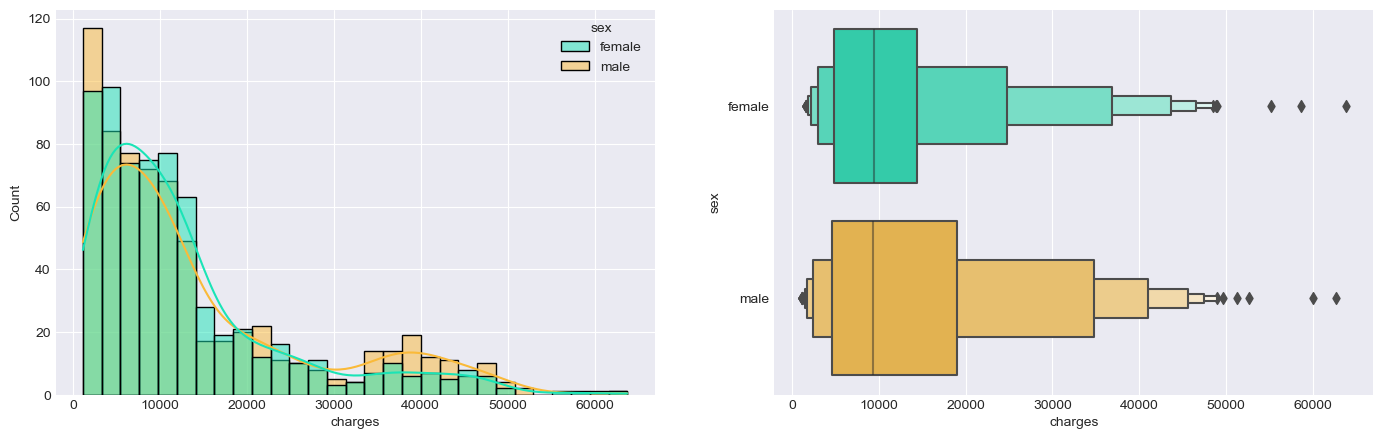

In [14]:
charges_dist_by_cate('sex')

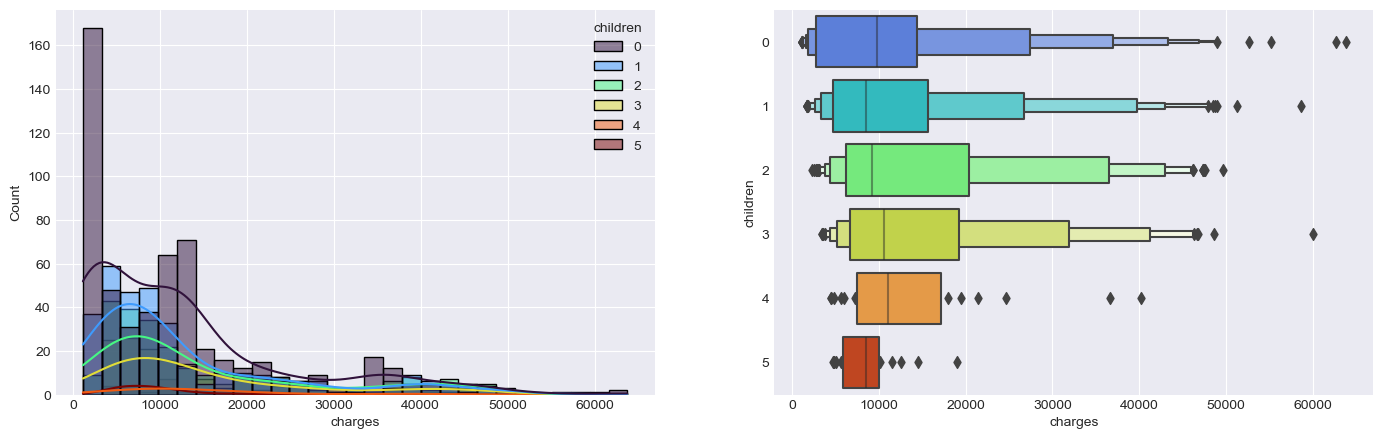

In [15]:
charges_dist_by_cate('children')

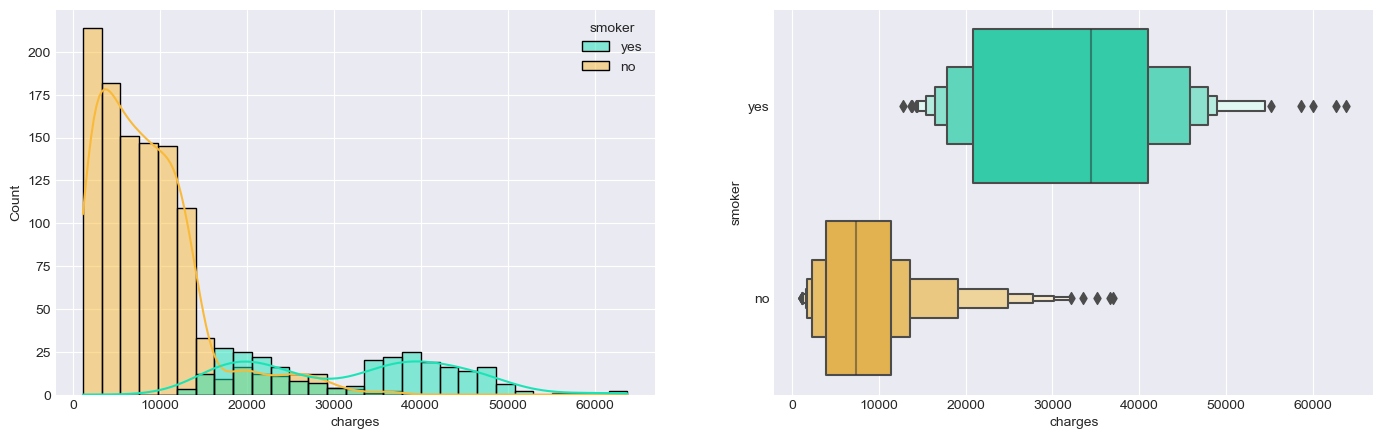

In [16]:
charges_dist_by_cate('smoker')

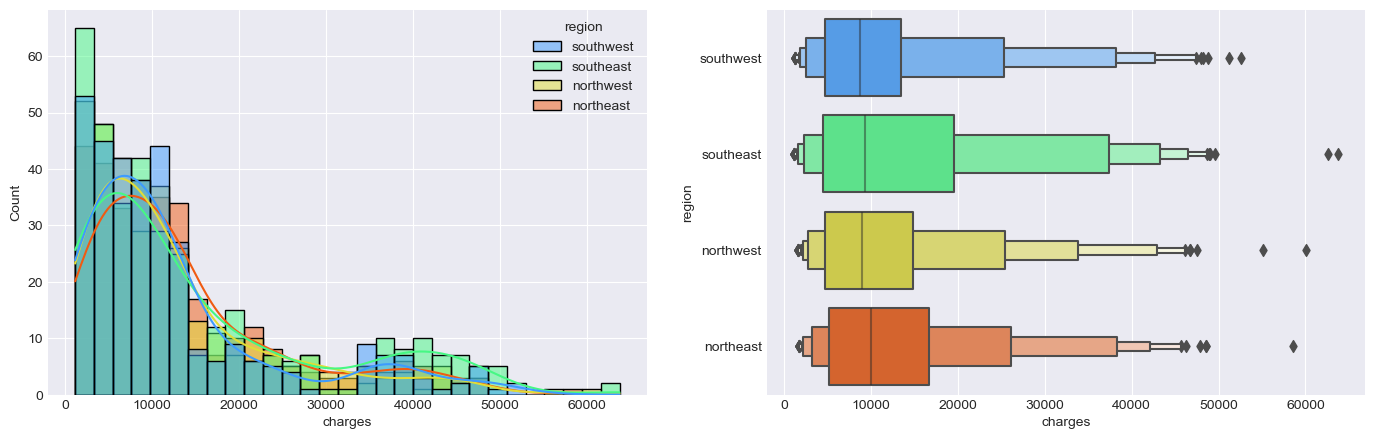

In [17]:
charges_dist_by_cate('region')

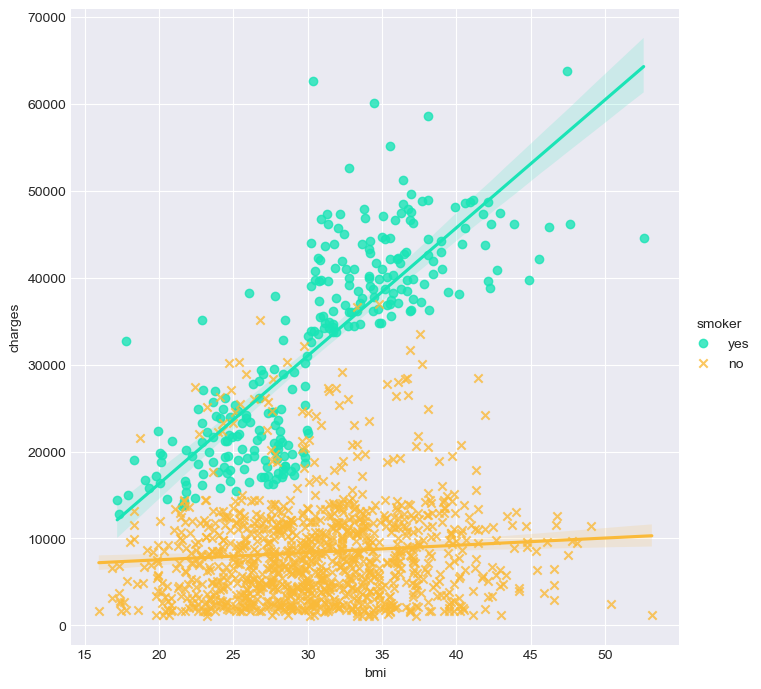

In [18]:
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', height=7, markers=['o', 'x'], palette='turbo')

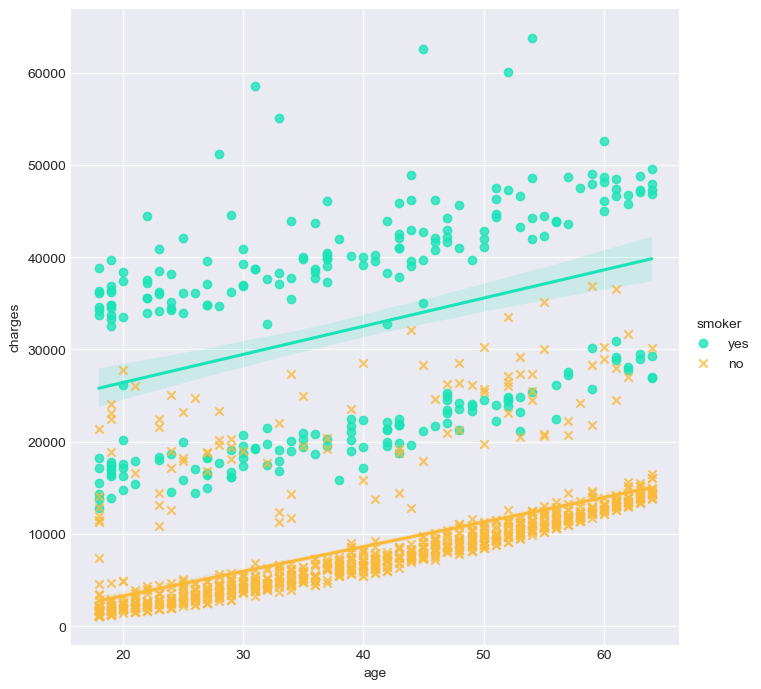

In [19]:
sns.lmplot(data=df, x='age', y='charges', hue='smoker', height=7, markers=['o', 'x'], palette='turbo')  # istnieje biblioteka ktora roznicuje kolor wraz ze wzrostem wieku

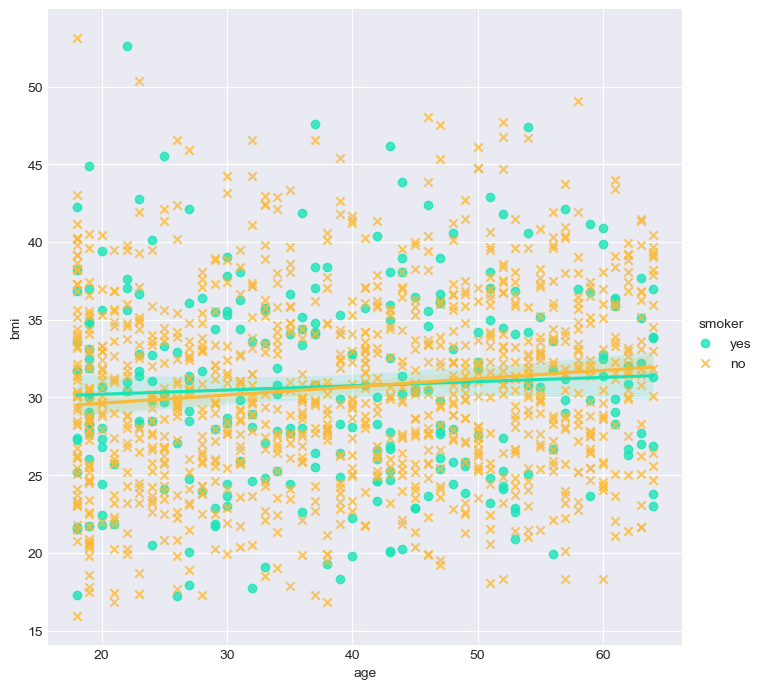

In [20]:
sns.lmplot(data=df, x='age', y='bmi', hue='smoker', height=7, markers=['o', 'x'], palette='turbo')

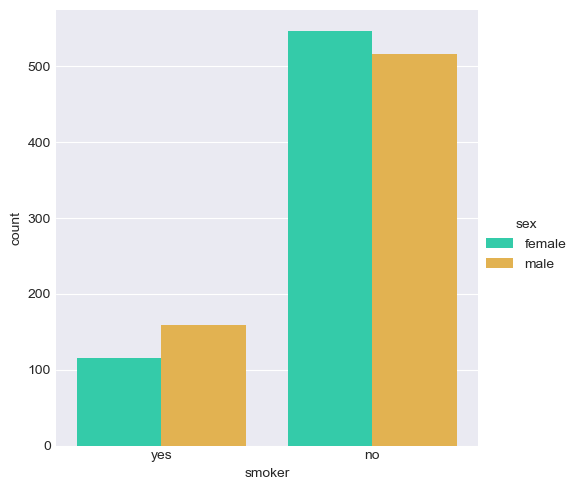

In [21]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="turbo", data=df)

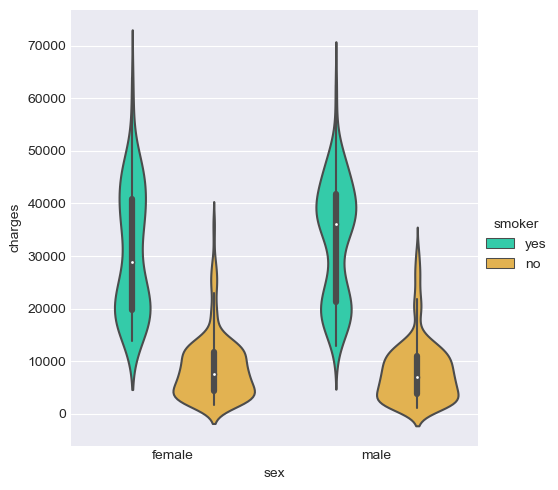

In [22]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=df, palette='turbo')

<AxesSubplot: xlabel='region', ylabel='charges'>

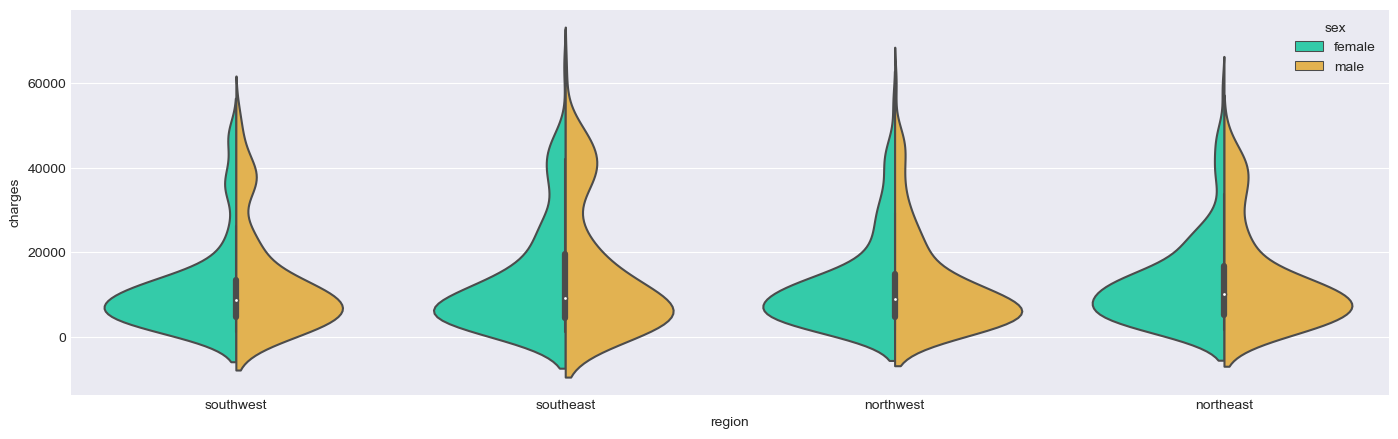

In [24]:
plt.figure(figsize=(17,5))
sns.violinplot(x='region', y='charges', hue='sex', data=df, palette='turbo', split=True)  # hue można zmienić ręcznie

<AxesSubplot: title={'center': 'Box plot for smoker charges'}, xlabel='charges', ylabel='smoker'>

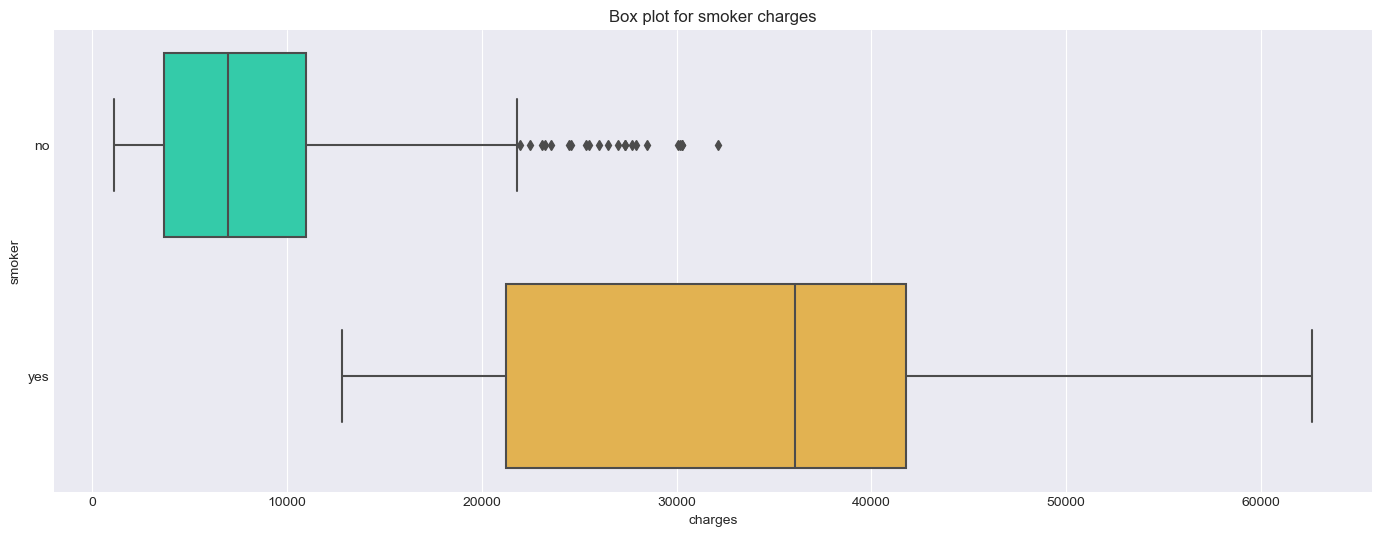

In [25]:
plt.title('Box plot for smoker charges')
sns.boxplot(y='smoker', x='charges', data=df[(df.sex=='male')], orient='h', palette='turbo')  # można zmienić płeć z ręki

C:\Users\Dell\AppData\Local\Temp\ipykernel_6300\1508688742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: title={'center': 'Distriburtion of age'}, xlabel='age', ylabel='Density'>

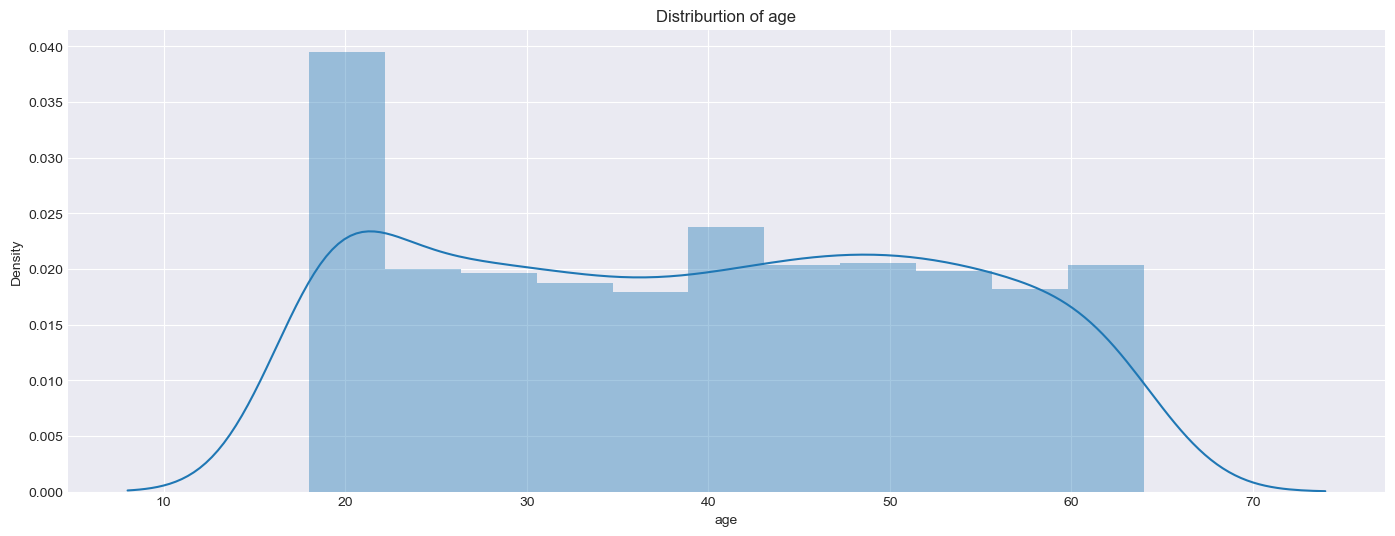

In [26]:
plt.title('Distriburtion of age')
sns.distplot(df['age'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_6300\374802166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<AxesSubplot: title={'center': 'Distriburtion of BMI'}, xlabel='bmi', ylabel='Density'>

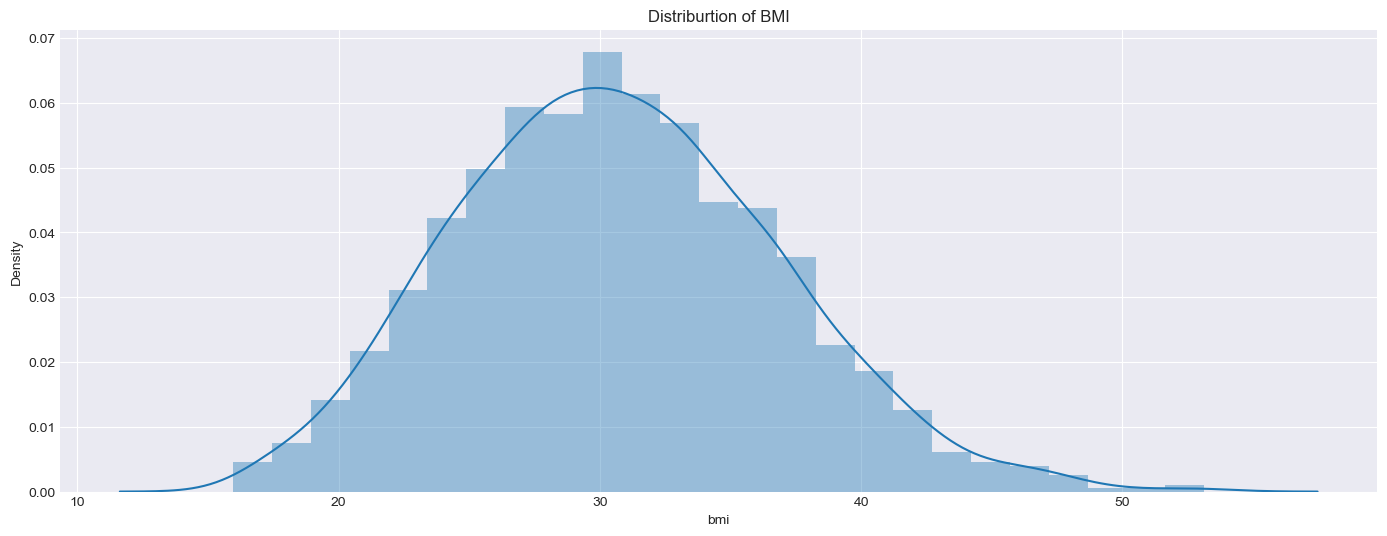

In [27]:
plt.title('Distriburtion of BMI')
sns.distplot(df['bmi'])

<AxesSubplot: xlabel='smoker', ylabel='charges'>

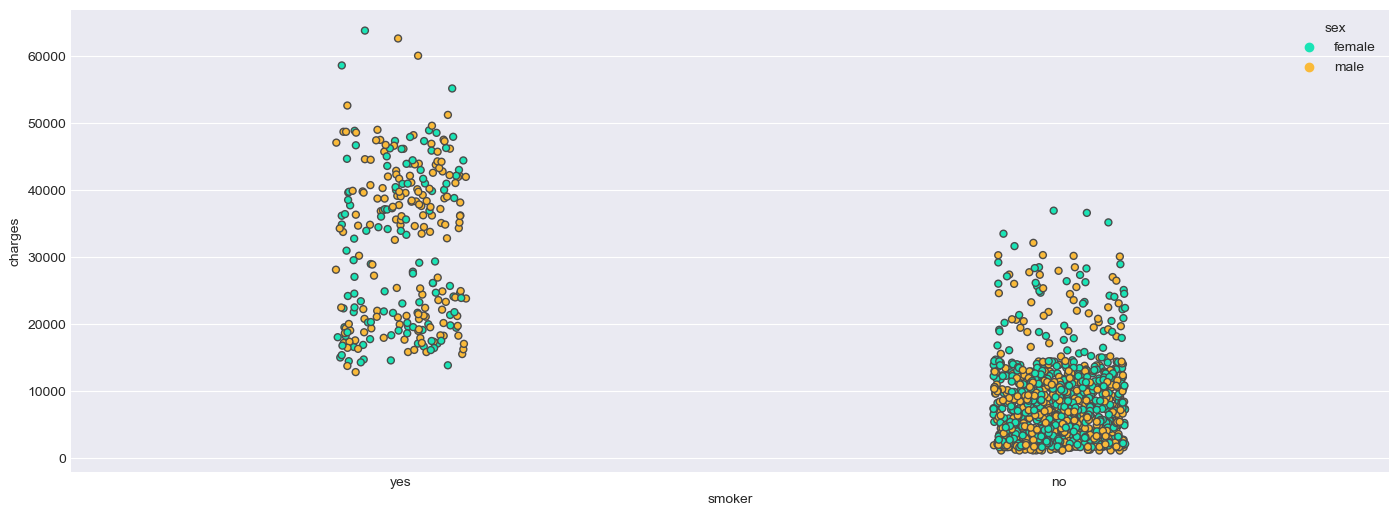

In [29]:
sns.stripplot(x='smoker', y="charges", hue='sex', data=df, linewidth=1, palette='turbo')

<AxesSubplot: xlabel='sex', ylabel='charges'>

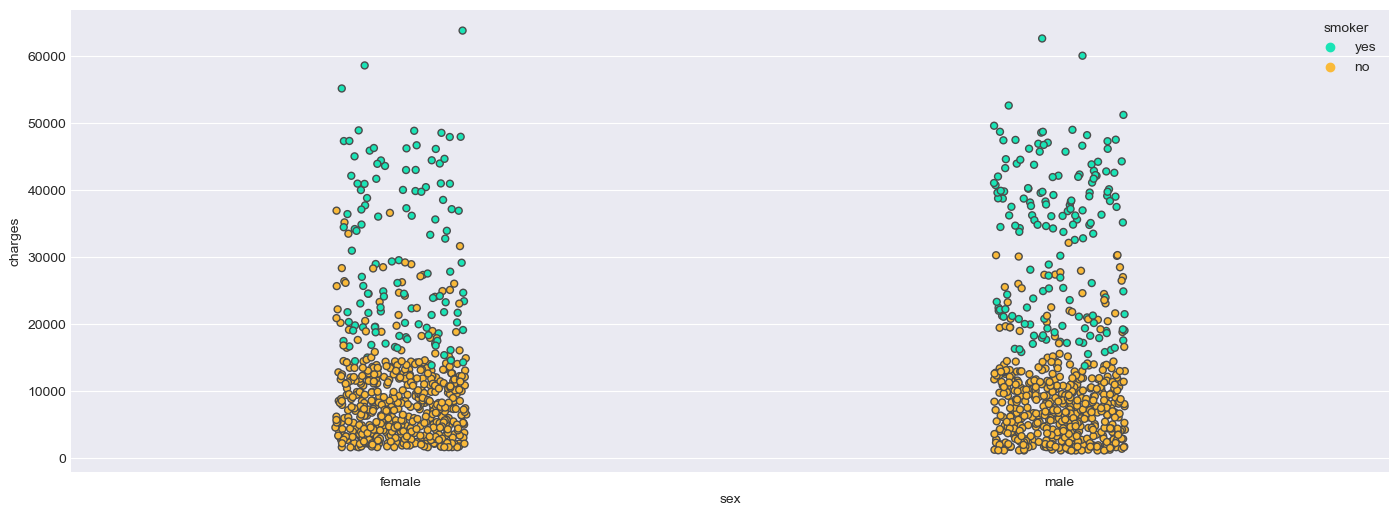

In [30]:
sns.stripplot(x='sex', y='charges', hue='smoker', data=df, linewidth=1, palette='turbo')

<AxesSubplot: xlabel='region', ylabel='charges'>

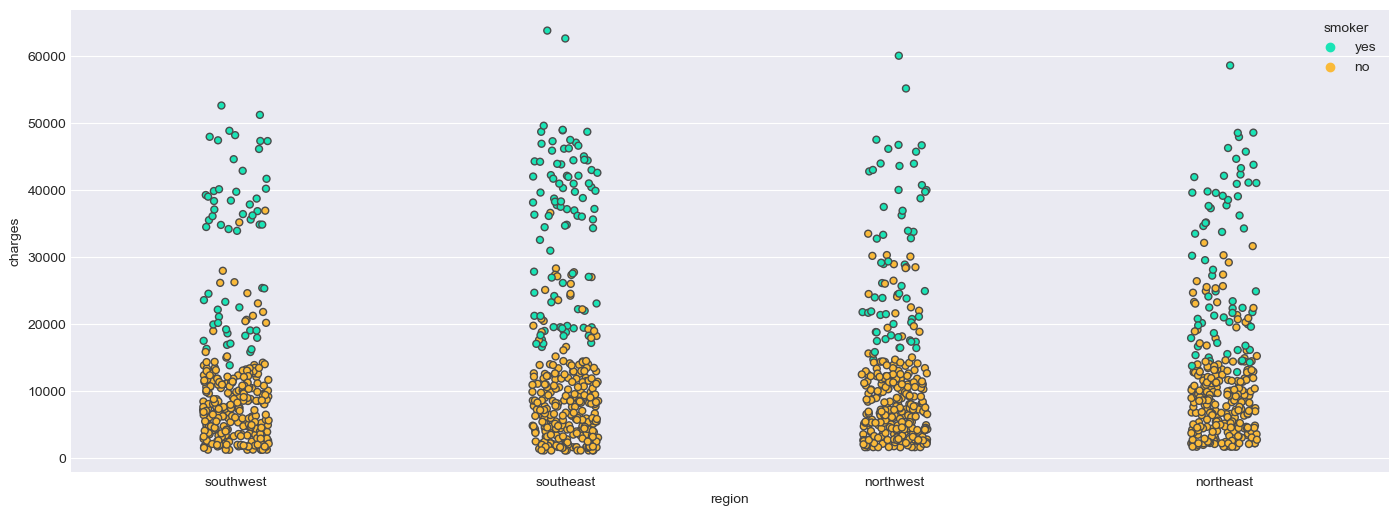

In [31]:
sns.stripplot(x='region', y='charges', hue='smoker', data=df, linewidth=1, palette='turbo')

sns.pairplot(df, hue='smoker', palette='turbo', corner=True)